In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PHYS 541 Final Project: Fire/EMS Logistics
### Name: Jacob Buchanan

My dad worked as an Assistant Chief in our local fire department until retirement and now works at a company selling data analysis software for public safety uses. This software is able to effectively run the dispatching for an entire department based on historical data, location, and so on. I have no idea how it works, but I imagine there's some heavy statistics going on behind the scenes. Fire departments have to decide how to structure their fleets; which stations should they place their trucks at? This was probably done through years of trial and error originally, but if one knew the historical statistics of fires in their locality, they could have a computer run this.

My goal is to start with a heat map (pun somewhat intended) of fire data and a set of fire stations at specific locations, a fleet of fire trucks, and from that determine the best placement of the fire trucks based on some metrics.

This could be considered an extension of the Bikeshare simulation done in class, although I'm going about this from scratch. This also could likely extend to a number of scenarios with some slight change.

### Part 1: Generate the map

I will assume my locality is a square and represent that with a matrix of configurable size. We'll say each unit is some distance. I'll ignore the existence of roads to avoid having to deal with pathing, but I'll consider traffic effects. Each point will contain some probability of having a fire occur in a time step. I'll start at zero and then add in two residential neighborhoods, an office park, and an industrial area. We'll say office parks have the lowest probability of a fire and industrial areas have the highest. I'll treat these as mostly uniform with some randomness (since some people are more likely to cause fires...).

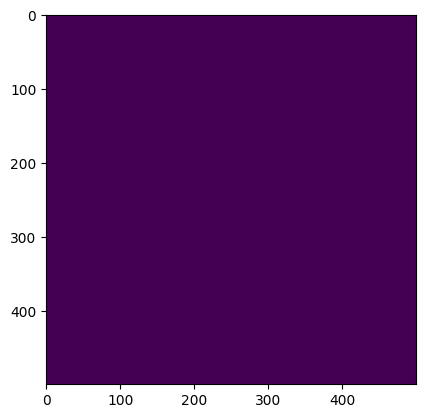

In [2]:
# Set up map
size = 500
fire_probability = np.zeros((size,size))
fig = plt.figure()
plt.imshow(fire_probability)

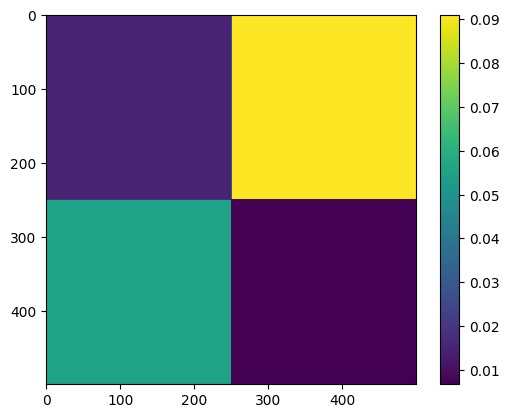

In [19]:
# Chunk this into quadrants for simplicity
def get_region(x,y):
    if (x < (size / 2)) and (y < (size / 2)):
        return 1
    elif (x > (size / 2)) and (y < (size / 2)):
        return 2
    elif (x < (size / 2)) and (y > (size / 2)):
        return 3
    else:
        return 4
    
# Each region follows a Gaussian distribution of its own
# Structure: dictionary with region number key; values are (mu, sigma) of normal distribution
get_prob = lambda mu,s: np.random.normal(mu, s)
probs = {
    1: get_prob(0.01, 0.003),
    2: get_prob(0.05, 0.008),
    3: get_prob(0.09, 0.01),
    4: get_prob(0.02, 0.006)
}

for x, _ in enumerate(fire_probability):
    for y, _ in enumerate(fire_probability[x]):
        reg = get_region(x, y)
        fire_probability[x][y] = probs[reg]

plt.imshow(fire_probability)
plt.colorbar()

In [3]:
# Each neighborhood has a fire station, placed randomly
